# <center> Prediccion de Precios en Bienes Raices - Mercado Australiano - Regresion Avanzada

# Tabla de Contenido

1. [Introduccion](#1.-Introduccion)
    - 1.1 [Integrates de Grupo](#1.1-Integrates-de-Grupo)
    - 1.2 [Entendimiento del Negocio](#1.2-Entendimiento-del-Negocio)
2. [Configuracion e Instalacion](#2.-Configuracion-e-Instalacion)
    - 2.1 [Instalación de librerias](#2.1-Instalación-de-librerias)
    - 2.2 [Lectura del dataset](#2.2-Lectura-del-dataset)
    - 2.3 [Elimnación de variables innecesarias](#2.3-Elimnación-de-variables-innecesarias)
3. [Entendimiento de los Datos](#3.-Entendimiento-de-los-Datos)  
4. [Manipulacion y Limpieza de Datos](#4.-Manipulacion-y-Limpieza-de-Datos)
    - 4.1 [Dropping Data](#4.1-Dropping-Data)
    - 4.2 [Derived Data](#4.2-Derived-Data)
5. [Analisis de Datos](#5.-Analisis-de-Datos)
    - 5.1 [Plot Numeric Data](#5.1-Plot-Numeric-Data)
    - 5.2 [Plot Categorical Data](#5.2-Plot-Categorical-Data)
6. [Modelado de Datos](#6.-Preparacion-de-Datos-y-Modelado)
    - 6.1 [Splitting data into Train Test](#6.1-Splitting-data-into-Train-Test)
7. [Construccion-del-Modelo](#7.-Cosnstrucción-del-Modelo)
    - 7.1 [Ridge Regression](#7.1-Ridge-Regression)
    - 7.2 [Lasso Regression](#7.2-Lasso-Regression)
    - 7.3 [ElasticNet Regression](#7.3-ElasticNet-Regression)
8. [Conclusions y Observaciones](#8.-Conclusiones-y-Observaciones)

# 1. Introducción 

## 1.1 Integrates de Grupo:
* Virginia Mercedes Fernández Daza (fernandez.vm@gmail.com)
* Marco Antonio Velasquez Rocha (Marco.velasquez@gmail.com)
* Ivan Israel Machicado Quiroga(machicado.ivan@gmail.com)
...

## 1.2 Entendimiento del Negocio

Una empresa de vivienda con sede en EE. UU. llamada Surprise Housing ha decidido ingresar al mercado australiano. La empresa utiliza el análisis de datos para comprar casas a un precio inferior a sus valores reales y venderlas a un precio más alto. Con el mismo propósito, la empresa ha recopilado un conjunto de datos de la venta de casas en Australia. Los datos se proporcionan en el archivo CSV a continuación.

La compañía está buscando posibles propiedades para comprar e ingresar al mercado. Debe construir un modelo de regresión utilizando la regularización para predecir el valor real de las posibles propiedades y decidir si invertir en ellas o no.

La empresa quiere saber:

* Qué variables son significativas para predecir el precio de una casa, y
* Qué tan bien esas variables describen el precio de una casa.

Además, determine el valor óptimo de lambda para la regresión de Ridge y Lasso.
 
### Objetivo del Negocio:

Debe modelar el precio de las casas con las variables independientes disponibles. Luego, la gerencia utilizará este modelo para comprender cómo varían exactamente los precios con las variables. En consecuencia, pueden manipular la estrategia de la empresa y concentrarse en áreas que generarán altos rendimientos. Además, el modelo será una buena manera para que la gerencia entienda la dinámica de precios de un nuevo mercado.

# 2. Configuracion e Instalación

## 2.1. Instalación de librerias

In [54]:
# Importar Librerias Requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import seaborn as sns
import sys
import statsmodels.api as sm

# Importar Librerias de Machine Learning
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Importar Librerias de Estadistica
import statsmodels.api as stats
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

# Ignorar Alertas (Warnings)
import warnings
warnings.filterwarnings('ignore')

# Definir precision del FLOAT a dos digitos.
pd.options.display.float_format = '{:.2f}'.format 

## 2.2 Lectura del dataset

In [8]:
# Leer el DATASET CSV con en un Dataframe.

# Direccion relativa del Dataset
#DATA_FILE_PATH = 'dataset.csv'
#data = pd.read_csv(DATA_FILE_PATH)

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjrupSM6vxnK-HE24k1-sxkuTDsAfVmodcor5Syx0ChlYygnvkBKRKezkhv0Po7wUANUd7TezBEfBi/pub?output=csv")

## 2.3 Elimnación de variables innecesarias

In [9]:
data.drop(columns=['Id'], inplace=True)

Se elimina la columna "Id", (drop, es la opción de pandas para eliminar columnas, inplace=TRUE, significa que no se crea otra variable, que se hace la madificacion en la misma data.
Esta eliminación se hace porque esta variable no se usa en ninguna parte del análisis y carece de importancia.

# 3. Entendimiento de los Datos

In [10]:
# Mostrar información básica del DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

A partir de esta información, ya podemos ver que algunas características (como Alley y PoolQC) no serán relevantes para nuestro análisis exploratorio, ya que hay demasiados valores faltantes. Además, hay tantas características para analizar que puede ser mejor centrarse en las que pueden proporcionarnos información real. Vamos a eliminar las características con un valor NaN del 30% o menos.

# 4. Manipulación y limpieza de Datos:


In [11]:
# Verificar valores nulos
null_columns = data.isnull().sum()
print(null_columns[null_columns > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Con este codigo se busca crear una variable que aglomere los datos nulos, el comando data.isnull().sum(), identifica los datos nulos, y estos se guardan en una variable llamada null_columns. De este modo, se identifican aquellas variables que poseen la mayor cantidad de datos nulos que son las siguientes:
Las variables que tinen demasiados faltantes no son relevantes para el analisis, lo mejor seria descartarlas:
        * Alley   Tipo de callejón de acceso a la propiedad
        * FireplaceQu  Calidad de la chimenea
        * PoolQC  Calidad de la piscina
        * Fence  Calidad de la valla
        * MiscFeature  Característica miscelánea no cubierta en otras categorías

## 4.1 Dropping-Data

In [12]:
data.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], inplace=True)

Se procedio a eliminar las 5, variables sin crear una nueva data sino modificando la data inicial

## 4.2 Derived-Data
Completando datos faltantes en variables relevantes

In [210]:
## LotFrontage (Pies lineales de calle conectados a la propiedad) -- convertir los valore nulos en 0
data['LotFrontage'].fillna(0, inplace=True)

## MasVnrType: Tipo de revestimiento de mampostería -- Llenar los nulos con "Ninguno"
data['MasVnrType'].fillna("Ninguno", inplace=True)

## MasVnrArea: Área de revestimiento de mampostería en pies cuadrados -- convertir los valore nulos en 0
data['MasVnrArea'].fillna(0, inplace=True)

## BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2 : Evalúa la el sótano -- Los nulos siginifica que no tiene sotano -- llenar los nulos con "NO"
data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']] = data[['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2']].fillna("No")

## Electrical : Sistema eléctrico -- Reemplazaremos el nulo por Mixto 
data['Electrical'].fillna("Mix", inplace=True)

# GarageType, GarageYrBlt, GarageFinish,GarageQual,GarageCond : Evalúa el garage -- Los nulos siginifica que no tiene garage -- llenar los nulos con "NO"
data[['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond']] = data[['GarageType', 'GarageYrBlt', 'GarageFinish','GarageQual','GarageCond']].fillna("No")


Se ha desarrollado el proceso de imputación de datos, de acuerdo al análisis variable por variable, pues cada variable tiene su propio significado, los comando fillna, rellenaran los valores faltantes con el valor elegido tras el análisis de cada variable, asignando cero en caso de ausencia.

In [211]:
# Verificar valores nulos
null_columns = data.isnull().sum()
print(null_columns[null_columns > 0])

Series([], dtype: int64)


Ahora se vuelve a verificar la data, buscando nulos y tal como se puede ver, la data ya no presenta datos nulos

# 5. Analisis Exploratorio de Datos: (EDA)

In [173]:
# Descripción estadística
print(data.describe())

       MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
count     1460.00      1460.00   1460.00      1460.00      1460.00    1460.00   
mean        56.90        57.62  10516.83         6.10         5.58    1971.27   
std         42.30        34.66   9981.26         1.38         1.11      30.20   
min         20.00         0.00   1300.00         1.00         1.00    1872.00   
25%         20.00        42.00   7553.50         5.00         5.00    1954.00   
50%         50.00        63.00   9478.50         6.00         5.00    1973.00   
75%         70.00        79.00  11601.50         7.00         6.00    2000.00   
max        190.00       313.00 215245.00        10.00         9.00    2010.00   

       YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
count       1460.00     1460.00     1460.00     1460.00  ...     1460.00   
mean        1984.87      103.12      443.64       46.55  ...       94.24   
std           20.65      180.73      456.1

LotArea:
Media: 10,516.83
Desviación estándar: 9,981.26
Interpretación: La variable LotArea, que representa el área del lote, muestra una alta dispersión. Esto indica que el tamaño de los lotes varía significativamente, con algunos lotes mucho más grandes que otros.

MasVnrArea:
Media: 103.12
Desviación estándar: 180.73
Interpretación: MasVnrArea, que indica el área de recubrimiento de mampostería en pies cuadrados, también muestra una alta dispersión. Esto sugiere que algunas propiedades tienen una gran cantidad de recubrimiento de mampostería, mientras que otras tienen poco o ninguno.

BsmtFinSF1:
Media: 443.64
Desviación estándar: 456.10
Interpretación: La variable BsmtFinSF1, que representa la superficie terminada del sótano tipo 1, tiene alta dispersión. Esto significa que algunas propiedades tienen una gran cantidad de espacio de sótano terminado, mientras que otras tienen poco o nada.

WoodDeckSF:
Media: 94.24
Desviación estándar: 125.34
Interpretación: WoodDeckSF, que representa el área de la terraza de madera, también tiene una alta variabilidad, indicando que algunas casas tienen terrazas grandes, mientras que otras no tienen ninguna.

OpenPorchSF:
Media: 46.66
Desviación estándar: 66.26
Interpretación: OpenPorchSF, que es el área de porche abierto en pies cuadrados, muestra una alta dispersión. Esto indica una gran variabilidad en el tamaño de los porches abiertos entre las propiedades.

MiscVal:
Media: 43.49
Desviación estándar: 496.12
Interpretación: MiscVal representa el valor de otros elementos o características especiales. La alta dispersión sugiere que la mayoría de las propiedades tienen poco o ningún valor adicional, mientras que algunas pocas tienen valores significativamente altos.

SalePrice:
Media: 180,921.20
Desviación estándar: 79,442.50
Interpretación: SalePrice, que representa el precio de venta de las casas, tiene una alta dispersión. Esto indica una gran variabilidad en los precios de las viviendas, probablemente debido a diferencias en el tamaño, la calidad, y las características de las propiedades.

## 5.1 Plot numerical data

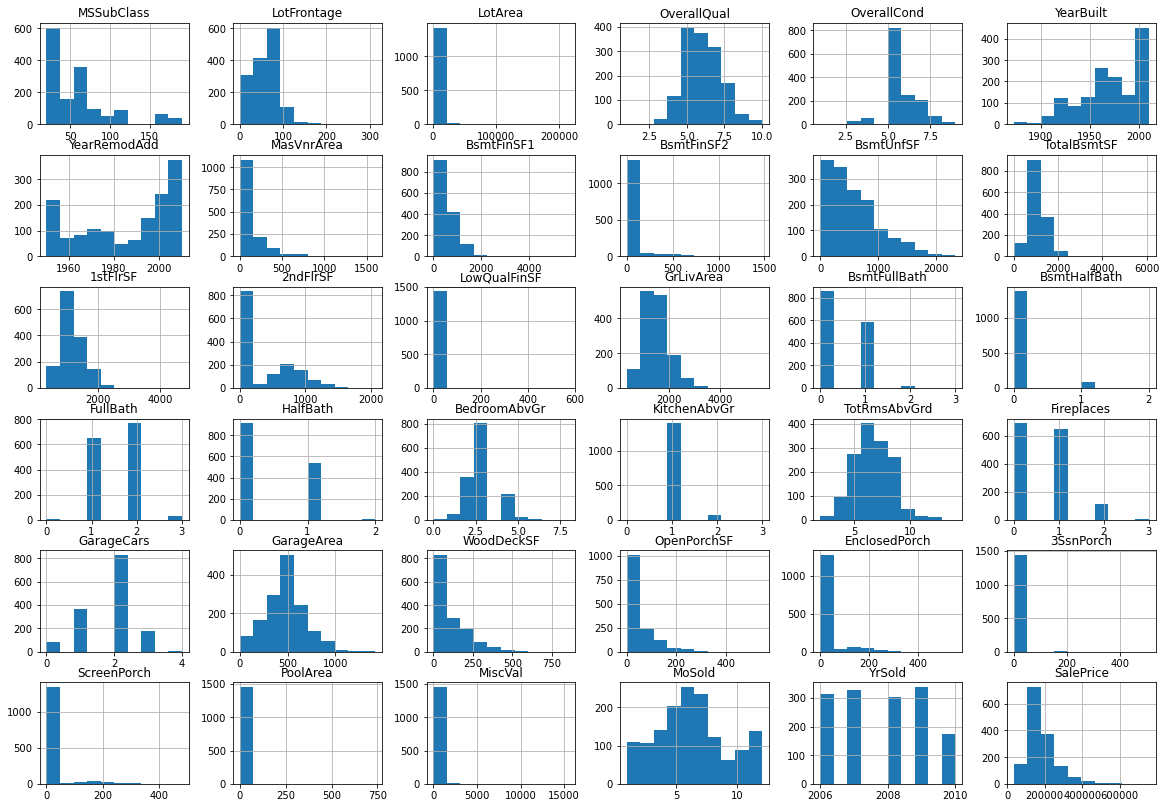

In [174]:
data.hist(figsize=(20,14))
plt.show()

Sesgo Positivo: Variables como LotArea, TotalBsmtSF, y GarageArea parecen tener un sesgo positivo, donde la mayor parte de los datos se agrupan hacia la izquierda con algunos valores extremos a la derecha. Esto sugiere que no se distribuyen normalmente.

Sesgo Negativo: Variables como Fireplaces y MiscVal muestran una concentración de valores en la parte inferior, sugiriendo un sesgo negativo.

Distribuciones Bimodales o Multimodales: Algunas variables, como OverallQual y TotRmsAbvGrd, pueden presentar características bimodales, indicando que podría haber subgrupos en los datos.

Concentraciones en Valores Específicos: Variables como MoSold y SalePrice pueden mostrar picos específicos, lo que sugiere que ciertos rangos de precios o meses de venta pueden ser más frecuentes.

Normalidad en Distribuciones: Algunas variables pueden aproximarse a una normalidad, especialmente aquellas que parecen tener una forma más simétrica, pero la mayoría de las variables en los histogramas presentados parecen desviarse de una distribución normal.

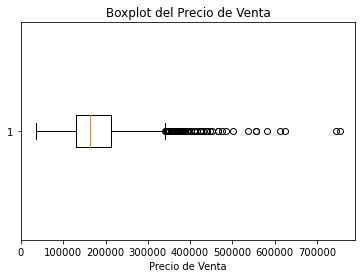

In [178]:
# Boxplot del precio de venta por calidad general
plt.boxplot(data['SalePrice'], vert=False)
plt.title('Boxplot del Precio de Venta')
plt.xlabel('Precio de Venta')
plt.show()

El diagrama de cajas muestra claramente lo que inicialmente transmiten los histogramas, que existe gran dispersión en la variable Saleprice. Exsisten precions muy altos en comparación con precios muy bajos.

In [175]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Extraer correlaciones con SalePrice
corr_sale_price = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(corr_sale_price)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.47
Fireplaces       0.47
BsmtFinSF1       0.39
WoodDeckSF       0.32
2ndFlrSF         0.32
OpenPorchSF      0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
LotFrontage      0.21
BedroomAbvGr     0.17
ScreenPorch      0.11
PoolArea         0.09
MoSold           0.05
3SsnPorch        0.04
BsmtFinSF2      -0.01
BsmtHalfBath    -0.02
MiscVal         -0.02
LowQualFinSF    -0.03
YrSold          -0.03
OverallCond     -0.08
MSSubClass      -0.08
EnclosedPorch   -0.13
KitchenAbvGr    -0.14
Name: SalePrice, dtype: float64


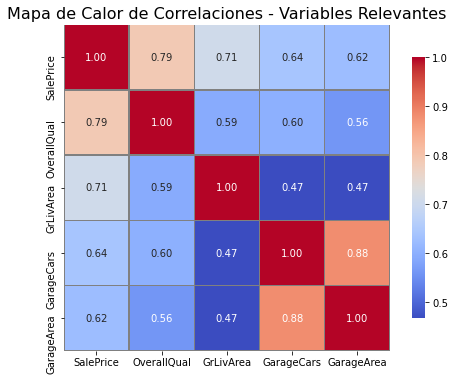

In [13]:
# Seleccionar las variables relevantes  
variables_relevantes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']  
data_relevante = data[variables_relevantes]  

# Calcular la matriz de correlación  
correlation_matrix = data_relevante.corr()  

# Configurar el tamaño del gráfico  
plt.figure(figsize=(8, 6))  

# Crear el mapa de calor  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',   
            square=True, cbar_kws={"shrink": .8},   
            linewidths=0.5, linecolor='gray')  

# Añadir título  
plt.title('Mapa de Calor de Correlaciones - Variables Relevantes', size=16)  
plt.show()

Las variables con las correlaciones más altas con SalePrice son:
OverallQual (0.79): La calidad general de la casa es el factor más fuerte que influye en el precio de venta.
GrLivArea (0.71): El área habitable sobre el suelo también tiene un impacto significativo en el precio.
GarageCars (0.64): La cantidad de espacios en el garaje es un fuerte predictor del precio.
GarageArea (0.62): El área del garaje también muestra una correlación considerable.
TotalBsmtSF (0.61) y 1stFlrSF (0.61): Ambas dimensiones del área del sótano y del primer piso son importantes.

Correlación Moderada:
Variables como FullBath (0.56) y TotRmsAbvGrd (0.53) (total de habitaciones sobre el nivel del suelo) también tienen una correlación moderada, lo que indica que más baños y habitaciones tienden a asociarse con precios más altos.

Correlaciones Menores:
Variables como MoSold (0.05) (mes de venta) y PoolArea (0.09) tienen correlaciones bastante bajas, lo que sugiere que estos factores son menos relevantes para el precio de venta.

Correlaciones Negativas:
Algunas variables muestran correlaciones negativas, como KitchenAbvGr (-0.14) y EnclosedPorch (-0.13), indicando que a medida que estas características aumentan, el precio tiende a bajar, aunque estas correlaciones no son muy fuertes.

Variables Irrelevantes:
Variables como BsmtFinSF2 (-0.01) y MiscVal (-0.02) presentan correlaciones cercanas a cero, lo que sugiere que no tienen un impacto significativo en el precio de venta.

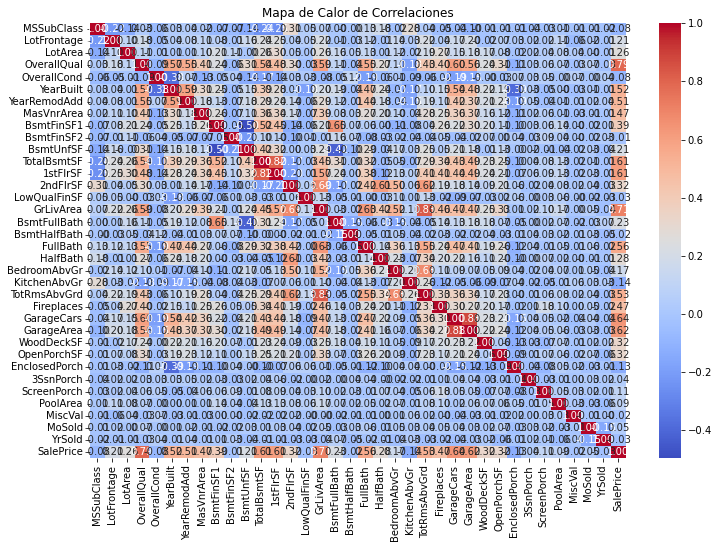

In [176]:
# Mapa de calor
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Se observan tambien las correlaciones en un mapa de calor, de todas las variables.

Ahora se observa el mapa de calor solo con las variables que presentan altas correlaciones.

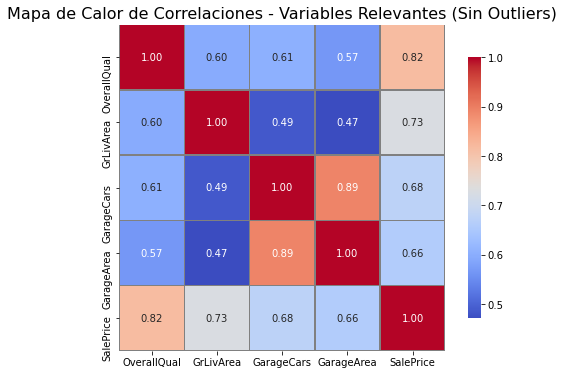

In [14]:
# Variables a corregir  
variables_a_corregir = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'SalePrice']  

def corregir_outliers(df, column):  
    # Calcular cuartiles y rango intercuartílico  
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  

    # Definir límites inferior y superior para los outliers  
    limite_inferior = Q1 - 1.5 * IQR  
    limite_superior = Q3 + 1.5 * IQR  

    # Sustituir outliers por el límite superior o inferior  
    df[column] = df[column].clip(lower=limite_inferior, upper=limite_superior)  

# Corregir outliers en las variables relevantes  
for variable in variables_a_corregir:  
    corregir_outliers(data, variable)  

# Ahora, si deseas verificar cómo afectan los outliers corregidos, puedes regenerar el mapa de calor:  
data_relevante = data[variables_a_corregir]  
correlation_matrix = data_relevante.corr()  

# Configurar el tamaño del gráfico  
plt.figure(figsize=(8, 6))  

# Crear el mapa de calor  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',   
            square=True, cbar_kws={"shrink": .8},   
            linewidths=0.5, linecolor='gray')  

# Añadir título  
plt.title('Mapa de Calor de Correlaciones - Variables Relevantes (Sin Outliers)', size=16)  
plt.show()

# 5.2 Plot categorical data

#### Análisis grafico de las variables categóricas Barras y Cajas

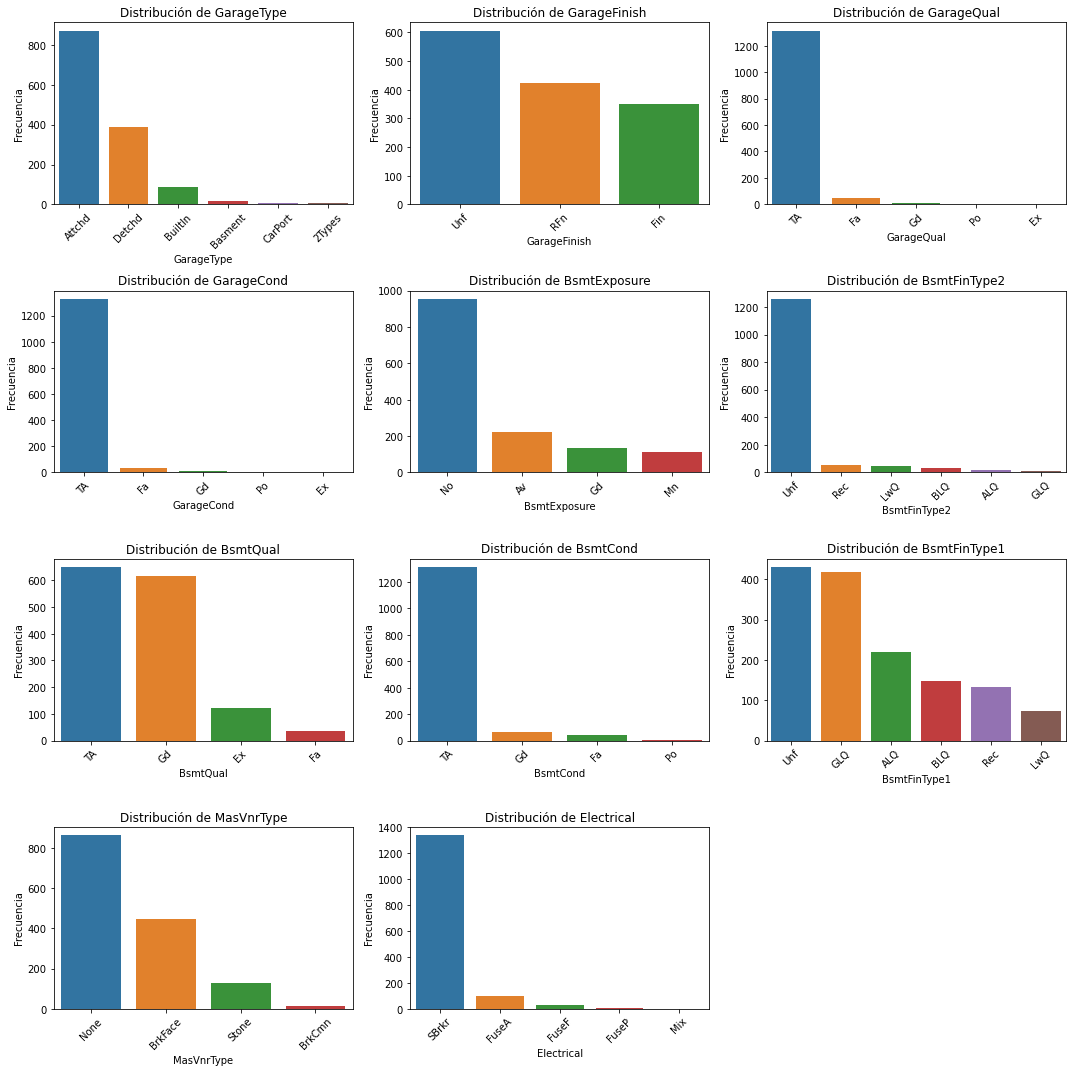

In [86]:
# Lista de variables categóricas a explorar
categorical_vars = [
    'GarageType', 
    'GarageFinish', 
    'GarageQual', 
    'GarageCond', 
    'BsmtExposure', 
    'BsmtFinType2', 
    'BsmtQual', 
    'BsmtCond', 
    'BsmtFinType1', 
    'MasVnrType', 
    'Electrical'
]

# Crear gráficos de barras para cada variable categórica
plt.figure(figsize=(15, 15))  # Tamaño de la figura

for i, column in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de subgráficas
    sns.countplot(data=categoricas, x=column, order=categoricas[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()  # Mostrar todos los gráficos


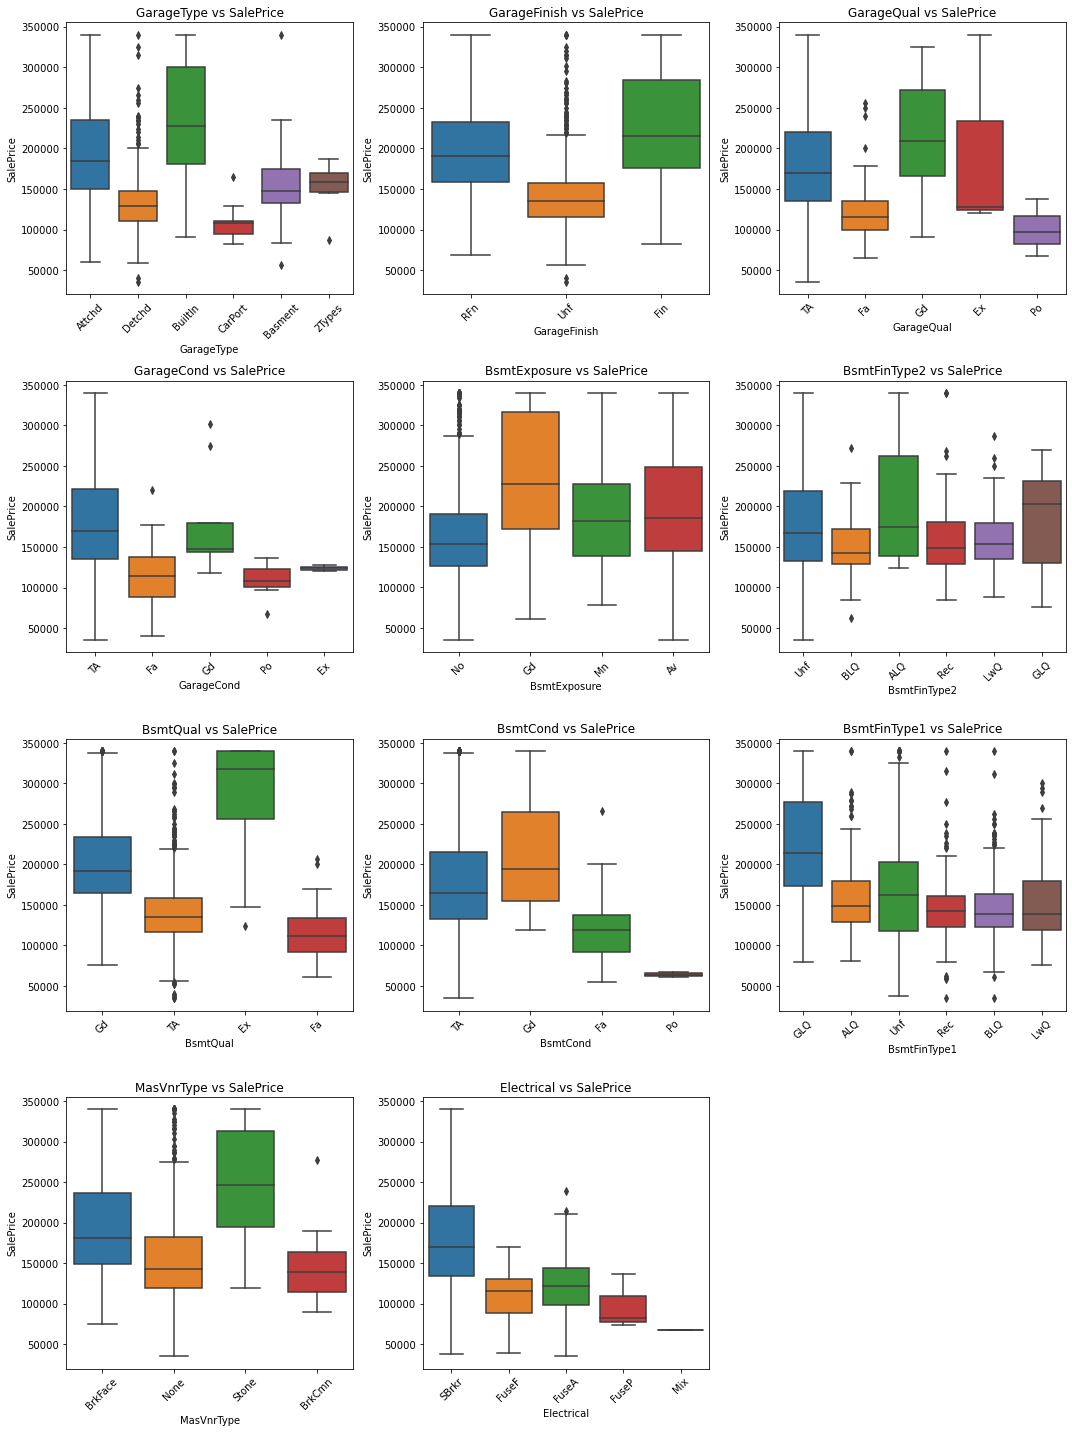

In [26]:
# Crear un nuevo DataFrame que contenga solo las variables categóricas y la variable objetivo
categoricas_con_target = data[categorical_vars + [target_variable]]

# Crear una figura para los gráficos de cajas
plt.figure(figsize=(15, 20))  # Tamaño de la figura

# Crear un gráfico de cajas para cada variable categórica
for i, column in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)  # Crear una cuadrícula de subgráficas
    sns.boxplot(data=categoricas_con_target, x=column, y=target_variable)
    plt.title(f'{column} vs {target_variable}')
    plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visibilidad
    plt.ylabel(target_variable)

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()  # Mostrar todos los gráficos


### Tratamiento de variables categóricas

In [20]:
# Filtrar variables categóricas
categoricas = data.select_dtypes(include=['object', 'category'])

# Mostrar el nuevo DataFrame de variables categóricas
print(categoricas.head())

  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functional  \
0      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
1      Veenker      Feedr       Norm  ...      SBrkr          TA        Typ   
2      CollgCr       Norm       Norm  ...      SBrkr          Gd        Typ   
3      Crawfor       Norm       Norm  ...      SBrkr          Gd        Typ   
4      NoRidge       Norm       Norm  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd         

#### Calculo los valores faltantes

In [21]:
# Calcular el número de valores faltantes por columna
missing_data = categoricas.isnull().sum()

# Filtrar solo las columnas con datos faltantes
missing_data = missing_data[missing_data > 0]

# Ordenar los resultados de mayor a menor
missing_data = missing_data.sort_values(ascending=False)

# Mostrar las variables con más datos faltantes
print(missing_data)


GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
Electrical       1
dtype: int64


In [27]:
# Definir un umbral para la cantidad de datos nulos
umbral_nulos = 30

# Filtrar las variables categóricas para eliminar aquellas que superan el umbral de datos nulos
categoricas_cleaned = categoricas.dropna(axis=1, thresh=len(categoricas) - umbral_nulos)

# Mostrar las variables eliminadas
eliminadas = set(categoricas.columns) - set(categoricas_cleaned.columns)
print("Variables eliminadas por exceso de datos nulos:", eliminadas)

# Mostrar el DataFrame limpio
print("\nDataFrame de variables categóricas después de eliminar columnas con muchos nulos:")
print(categoricas_cleaned.head())


Variables eliminadas por exceso de datos nulos: {'GarageFinish', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'GarageQual', 'GarageCond', 'GarageType', 'BsmtCond', 'BsmtQual'}

DataFrame de variables categóricas después de eliminar columnas con muchos nulos:
  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Foundation Heating HeatingQC  \
0      CollgCr       Norm       Norm  ...      PConc    GasA        Ex   
1      Veenker      Feedr       Norm  ...     CBlock    GasA        Ex   
2      CollgCr       Norm       Norm  ...      PConc    GasA        Ex   
3      Cr

#### Identificion de outliers

In [28]:
# Definir un umbral para la frecuencia mínima de las categorías
frecuencia_minima = 5  # Puedes ajustar este valor según tus necesidades

# Función para agrupar categorías raras
def agrupar_categorias_raras(columna):
    conteo = columna.value_counts()
    categorias_raras = conteo[conteo < frecuencia_minima].index
    return columna.replace(categorias_raras, 'Otros')

# Aplicar la función a cada columna categórica en categoricas_cleaned
for column in categoricas_cleaned.columns:
    categoricas_cleaned[column] = agrupar_categorias_raras(categoricas_cleaned[column])

# Mostrar el DataFrame después de tratar los outliers
print("\nDataFrame de variables categóricas después de agrupar categorías raras:")
print(categoricas_cleaned.head())



DataFrame de variables categóricas después de agrupar categorías raras:
  MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... Foundation Heating HeatingQC  \
0      CollgCr       Norm       Norm  ...      PConc    GasA        Ex   
1      Veenker      Feedr       Norm  ...     CBlock    GasA        Ex   
2      CollgCr       Norm       Norm  ...      PConc    GasA        Ex   
3      Crawfor       Norm       Norm  ...     BrkTil    GasA        Gd   
4      NoRidge       Norm       Norm  ...      PConc    GasA        Ex   

  CentralAir Electrical KitchenQual Functional Pa

#### Agrupamiento de Outliers en categorías raras con el nombre de otros

In [49]:
for col in categoricas_cleaned.columns:
    print(f"Categorías en '{col}':")
    print(categoricas_cleaned[col].value_counts())
    print("\n")


Categorías en 'MSZoning':
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Categorías en 'Street':
Pave    1454
Grvl       6
Name: Street, dtype: int64


Categorías en 'LotShape':
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Categorías en 'LandContour':
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


Categorías en 'Utilities':
AllPub    1459
Otros        1
Name: Utilities, dtype: int64


Categorías en 'LotConfig':
Inside     1052
Corner      263
CulDSac      94
FR2          47
Otros         4
Name: LotConfig, dtype: int64


Categorías en 'LandSlope':
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


Categorías en 'Neighborhood':
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber   

*Cocnlusión referente al tratamiento de outliers:*
Agrupar categorías raras y tratar outliers en variables categóricas mejora la calidad del modelo y su interpretabilidad. Las categorías con pocas observaciones pueden causar inestabilidad y ruido en el modelo, por lo que se agrupan bajo etiquetas comunes como “Otro” o “Raro”, reduciendo así la complejidad del análisis. Este enfoque simplifica el conjunto de datos, ayuda a evitar el sobreajuste y mejora la eficiencia del modelo al reducir la dimensionalidad. Además, la agrupación de categorías infrecuentes permite mantener la integridad de los datos sin eliminar información valiosa, resultando en un modelo más robusto y fácil de interpretar.

# 6. Modelado de Datos

In [40]:
### Regresion Lineal
# Dividir los datos en conjunto de entrenamiento y prueba
X = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']]  
y = data['SalePrice']  
X_train, X_test, y_train, y_test = train_test_split(X, data['SalePrice'], test_size=0.2, random_state=42)

# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R²:', r2_score(y_test, y_pred))

RMSE: 28933.351752817493
R²: 0.8287797005737021


# 6.1 Primer modelo solo con variables numericas

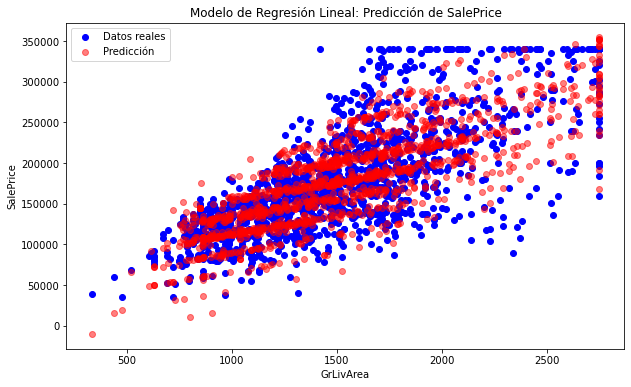

In [41]:
# Graficar la predicción en función de una de las variables independientes (por ejemplo, GrLivArea)  
plt.figure(figsize=(10, 6))  
plt.scatter(data['GrLivArea'], y, color='blue', label='Datos reales')  
plt.scatter(data['GrLivArea'], model.predict(X), color='red', label='Predicción', alpha=0.5)  
plt.title('Modelo de Regresión Lineal: Predicción de SalePrice')  
plt.xlabel('GrLivArea')  
plt.ylabel('SalePrice')  
plt.legend()  
plt.show()

*Interpretación del modelo*
En resumen, el modelo tiene un buen ajuste con un R2   superior al 82%, indicando que casi el 80% de la variabilidad en el precio de las casas puede ser explicada por las variables OverallQual, GrLivArea, GarageCars, y GarageArea. La prueba F indica que al menos una de estas variables tiene un efecto significativo en el precio de venta. Este modelo parece prometedor, pero siempre es recomendable realizar diagnósticos adicionales (como verificar supuestos de residuos) para asegurar la validez del modelo.

## 6.2 Segundo modelo considerando las variables numéricas y categóricas fundamentales

In [33]:
numerical_vars = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

# Crear un nuevo DataFrame con las variables numéricas
numerical_df = data[numerical_vars]

# Concatenar el DataFrame de variables categóricas limpias con el nuevo DataFrame de variables numéricas
combined_df = pd.concat([categoricas_cleaned.reset_index(drop=True), numerical_df.reset_index(drop=True)], axis=1)


In [50]:
# Realizar One-Hot Encoding para las variables categóricas, convertimos a DUMMY
data_encoded = pd.get_dummies(combined_df, drop_first=True)

# Ver las primeras filas del nuevo DataFrame
print(data_encoded.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  MSZoning_FV  \
0  208500.00            7    1710.00        2.00      548.00            0   
1  181500.00            6    1262.00        2.00      460.00            0   
2  223500.00            7    1786.00        2.00      608.00            0   
3  140000.00            7    1717.00        3.00      642.00            0   
4  250000.00            8    2198.00        3.00      836.00            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  ...  SaleType_ConLI  \
0            0            1            0            1  ...               0   
1            0            1            0            1  ...               0   
2            0            1            0            1  ...               0   
3            0            1            0            1  ...               0   
4            0            1            0            1  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Otros  SaleType_WD  \
0   

In [51]:
### Regresion Lineal
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_encoded.drop(columns=['SalePrice'])
y = data_encoded['SalePrice']
# Imputar valores nulos con la media
X.fillna(X.mean(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, data_encoded['SalePrice'], test_size=0.2, random_state=42)

# Ajustar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y evaluar
y_pred = model.predict(X_test)
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R²:', r2_score(y_test, y_pred))

RMSE: 23294.8089609115
R²: 0.8890119899836523


Explicación de la Representación:
Dimensionalidad Reducida: Aunque el modelo utiliza muchas variables (multidimensional), al final produce una única predicción para cada observación en el conjunto de prueba. Esta predicción es un valor único que representa el SalePrice estimado, lo cual podemos trazar contra el SalePrice real en un gráfico 2D.

Visualización de Ajuste: En el gráfico de dispersión:

El eje x representa el SalePrice real (observado).
El eje y representa el SalePrice predicho.
La línea ideal trazada en rojo indica la perfección del modelo: si todos los puntos cayeran en esta línea, significaría que los valores predichos son exactamente iguales a los valores reales.
Propósito de la Gráfica: Este gráfico no pretende mostrar la relación entre todas las variables independientes y SalePrice en sí, sino evaluar la capacidad del modelo para acercarse a los valores reales de SalePrice. Es una representación del rendimiento del modelo, y no de la relación individual entre las características y el precio.

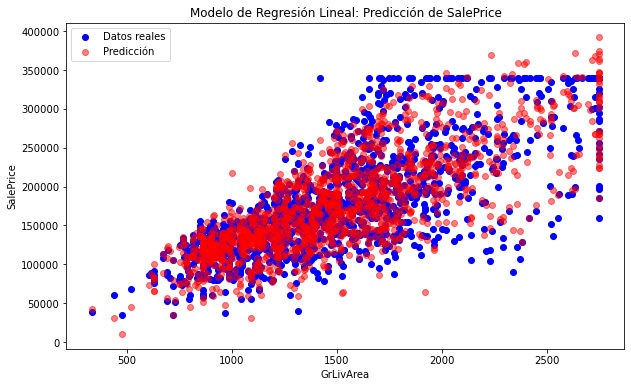

In [52]:
# Graficar la predicción en función de una de las variables independientes (por ejemplo, GrLivArea)  
plt.figure(figsize=(10, 6))  
plt.scatter(data['GrLivArea'], y, color='blue', label='Datos reales')  
plt.scatter(data['GrLivArea'], model.predict(X), color='red', label='Predicción', alpha=0.5)  
plt.title('Modelo de Regresión Lineal: Predicción de SalePrice')  
plt.xlabel('GrLivArea')  
plt.ylabel('SalePrice')  
plt.legend()  
plt.show()

### Modelo predictivo de variables numéricas y categóricas

RMSE: 23294.8089609115
R²: 0.8890119899836523


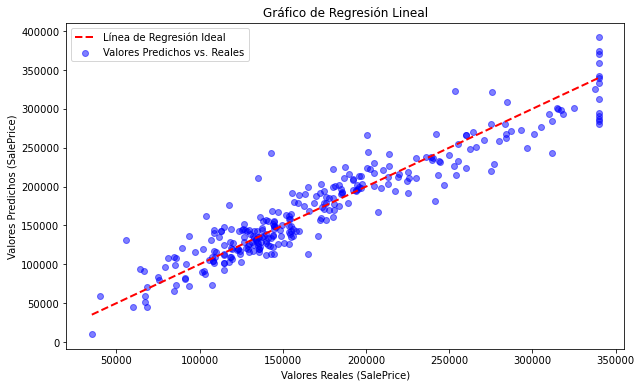

In [53]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Variables independientes (X) y dependiente (y)
X = data_encoded.drop(columns=['SalePrice'])
y = data_encoded['SalePrice']

# Imputación de valores nulos con la media
X.fillna(X.mean(), inplace=True)

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R²:', r2)

# Gráfico de regresión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Valores Predichos vs. Reales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Línea de Regresión Ideal")
plt.xlabel('Valores Reales (SalePrice)')
plt.ylabel('Valores Predichos (SalePrice)')
plt.title('Gráfico de Regresión Lineal')
plt.legend()
plt.show()


### Interpretación
RMSE (Root Mean Squared Error):

Un RMSE más bajo indica un mejor ajuste del modelo a los datos. Aquí, el RMSE en el conjunto de entrenamiento es menor que en el conjunto de prueba (20,179.14 vs. 23,294.81), lo que sugiere que el modelo tiene un mejor desempeño en los datos de entrenamiento.
Esto puede ser una señal de sobreajuste, donde el modelo ha aprendido demasiado bien las particularidades del conjunto de entrenamiento, incluyendo el ruido y las fluctuaciones aleatorias, lo que resulta en un peor desempeño en datos no vistos (el conjunto de prueba).
R² (Coeficiente de Determinación):

Un R² más cercano a 1 indica que el modelo explica bien la variación en los datos. El R² del conjunto de entrenamiento es 0.91, lo que indica que el modelo explica el 91% de la varianza en los datos de entrenamiento.
El R² en el conjunto de prueba es 0.89, que sigue siendo alto, pero es ligeramente más bajo que el de entrenamiento. Esto también puede indicar que el modelo está ajustado demasiado a los datos de entrenamiento.
Conclusiones
Sobreajuste: Los resultados sugieren que puede haber un cierto grado de sobreajuste. El modelo parece funcionar muy bien con los datos de entrenamiento, pero su desempeño es un poco menos efectivo en el conjunto de prueba. La diferencia en el RMSE y el R² entre ambos conjuntos es una señal de que el modelo podría estar capturando ruido específico del conjunto de entrenamiento.

Subajuste: No hay evidencia de subajuste aquí. El modelo tiene un rendimiento sólido en ambos conjuntos de datos, con valores de R² que indican una buena capacidad predictiva. Un modelo subajustado típicamente mostraría valores de RMSE altos y valores de R² mucho más bajos (por ejemplo, menos de 0.70).

### Sugerencia
 Ver otras tecnicas de correlación, RIDGE, LASSO Y ELASTICNET. Para analizar profundamente el posible sobreajuste y la algunos indicios de multicolinealidad 

## Analisis de multicolinealidad modelo numéricas y categóricas

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Crear un DataFrame con las variables del modelo (sin la variable objetivo)
X = data_encoded.drop(columns=['SalePrice'])

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar el resultado
print(vif_data)


                  Variable   VIF
0              OverallQual 89.23
1                GrLivArea 48.00
2               GarageCars 46.66
3               GarageArea 41.24
4              MSZoning_FV 16.18
..                     ...   ...
141   SaleCondition_Alloca  1.49
142   SaleCondition_Family  1.34
143   SaleCondition_Normal 17.18
144    SaleCondition_Otros  1.42
145  SaleCondition_Partial 50.31

[146 rows x 2 columns]


### Concluisones de multicolinealidad - Método del Factor Inflador de Varianza (VIF)

#### Variables con Alto VIF

OverallQual: 89.23

Este valor es extremadamente alto, lo que indica que OverallQual tiene una alta correlación con una o más de las otras variables en el modelo. Esto puede causar inestabilidad en los coeficientes de la regresión y sugerir que se podría considerar eliminar o transformar esta variable para mejorar la interpretación del modelo.

GrLivArea: 48.00

También tiene un VIF alto, lo que sugiere que está correlacionada con otras variables. GrLivArea (área habitable) puede ser una variable importante, pero deberías revisar qué otras variables están causando esta multicolinealidad.

GarageCars: 46.66

Similar a GrLivArea, sugiere que GarageCars tiene relaciones significativas con otras variables que podrían estar afectando la calidad del modelo.

GarageArea: 41.24

Al igual que las anteriores, este alto VIF indica multicolinealidad, lo que puede hacer que el modelo sea menos confiable.

MSZoning_FV: 16.18

Aunque el VIF es alto, está por debajo de 20. Esto indica que, aunque puede haber correlación, no es tan severa como en los casos anteriores. Sin embargo, es una señal para revisar su relación con otras variables.

Variables con Bajo VIF

SaleCondition_Alloca: 1.49
SaleCondition_Family: 1.34
SaleCondition_Otros: 1.42
SaleCondition_Partial: 50.31

Estas variables tienen VIF cercanos a 1, lo que indica que no tienen multicolinealidad y que son independientes de las otras variables en el modelo. Esto es deseable.

#### Conclusiones Generales

Identificar y Tratar la Multicolinealidad: Las variables con VIF mayores a 10 (como OverallQual, GrLivArea, GarageCars, GarageArea) sugieren que hay multicolinealidad significativa en el modelo. Sería prudente considerar eliminar o combinar algunas de estas variables.

Revisar Relaciones entre Variables: Se recomienda investigar las correlaciones entre las variables con alto VIF para determinar cuáles pueden estar causando la multicolinealidad. Puedes hacerlo utilizando un mapa de calor (heatmap) para visualizar las correlaciones.

Modelos de Regularización: Si decides mantener estas variables, considera usar métodos de regularización (como Ridge Regression o Lasso Regression) que pueden ayudar a manejar la multicolinealidad al penalizar los coeficientes de las variables correlacionadas.

Ajustar el Modelo: Basado en la interpretación de los VIF, puedes ajustar el modelo para mejorar su estabilidad y predicción.

#  7. Cosnstrucción del Modelo

## 7.1 Modelo Ridge

In [43]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Ajustar el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar alpha según sea necesario
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
ridge_coefficients = ridge_model.coef_
print('Ridge RMSE:', mean_squared_error(y_test, y_pred_ridge, squared=False))
print('Ridge R²:', r2_score(y_test, y_pred_ridge))

Ridge RMSE: 23130.565722233976
Ridge R²: 0.8905715449140024


## Prueba de multicolinealidad para el modelo de RIDGE

In [57]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo Ridge
ridge_model = Ridge(alpha=1.0)  # Puedes ajustar alpha según sea necesario
ridge_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_test)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print('Ridge RMSE:', ridge_rmse)
print('Ridge R²:', ridge_r2)

# Cálculo de los coeficientes
ridge_coefficients = ridge_model.coef_
print('Ridge Coefficients:', ridge_coefficients)

# Evaluación de la multicolinealidad usando VIF
# Agregar una constante a X para el cálculo del VIF
X_with_const = sm.add_constant(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


Ridge RMSE: 23130.565722233976
Ridge R²: 0.8905715449140024
Ridge Coefficients: [ 9.80967510e+03  6.14863626e+01  5.00703385e+03  1.80623669e+01
  1.95103494e+04  1.02181927e+04  1.25987034e+04  1.02917536e+04
 -1.56588873e+03  4.33919088e+03  6.14964085e+03 -3.41525007e+03
  2.35816625e+04  1.41113759e+04  1.46608415e+04 -1.80219750e+04
  7.49570264e+03 -3.58409832e+03 -5.16592157e+02 -5.15782735e+03
  1.22333149e+04  2.59740900e+04  3.02143310e+03 -8.47503598e+02
  1.52213489e+04 -3.98319230e+03  1.36493988e+04 -1.30401524e+04
 -4.62732676e+03 -9.76340802e+03 -1.02506256e+04 -6.58939830e+03
 -1.05694202e+04  9.62249351e+03 -6.93838860e+03  2.36450577e+04
  2.30401871e+04 -1.66059785e+04 -2.75182312e+02 -8.73902079e+03
 -4.99525584e+03 -1.57433785e+03  3.51925491e+03  2.87432198e+04
  8.06320207e+03  2.73072249e+04 -1.44776714e+03  1.09977165e+04
  1.22715288e+03  1.05736670e+04  7.94481636e+03 -3.81980170e+03
  1.02262531e+04  1.54131602e+04  1.27964072e+04 -4.59018461e+03
 -2.183488

#### Concluisones de multicolinealidad de modelo Ridge
Variable const: VIF de 2606.50

Este valor es extremadamente alto y sugiere problemas serios de multicolinealidad. Esto se debe a que el término constante puede no tener una interpretación directa, pero indica que al menos una variable tiene una alta correlación con otras variables.
Otras Variables y sus VIFs

OverallQual (4.45), GrLivArea (4.56), GarageCars (7.10), GarageArea (6.70):
Estas variables tienen VIFs superiores a 4, lo que indica que hay cierta multicolinealidad presente, pero no es necesariamente crítica. Los valores de VIF entre 4 y 10 indican que las variables están correlacionadas, lo que puede ser problemático, pero no al nivel más severo.
SaleCondition_Partial (46.04):
Este valor es muy alto, lo que indica que esta variable tiene una fuerte colinealidad con otras variables del modelo. Se recomienda evaluar esta variable en particular, ya que podría estar influyendo en la estabilidad del modelo.

## Soluciones al modelo Ridge

In [58]:
# Elimnar las variables con alta multicolianealidad
# Calcular VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Filtrar variables con VIF alto
def remove_high_vif(X, threshold=5.0):
    while True:
        vif_data = calculate_vif(X)
        # Encontrar la variable con el VIF más alto
        max_vif = vif_data['VIF'].max()
        if max_vif > threshold:
            remove_variable = vif_data.loc[vif_data['VIF'] == max_vif, 'Variable'].values[0]
            print(f'Removing {remove_variable} with VIF {max_vif}')
            X = X.drop(columns=[remove_variable])
        else:
            break
    return X

# Aplicar eliminación de variables con alto VIF
X_cleaned = remove_high_vif(X)


Removing RoofStyle_Gable with VIF 338.79471191860046
Removing Condition2_Norm with VIF 280.4545890942773
Removing Street_Pave with VIF 261.31724181662054
Removing MSZoning_RL with VIF 161.20794423025706
Removing Exterior1st_VinylSd with VIF 147.93345766993755
Removing Functional_Typ with VIF 107.39572543129414
Removing OverallQual with VIF 82.75005835818294
Removing ExterCond_TA with VIF 63.975842480007536
Removing SaleType_New with VIF 52.22107281826222
Removing Exterior2nd_MetalSd with VIF 47.77939349006447
Removing GarageCars with VIF 46.05577354011724
Removing ExterQual_TA with VIF 38.971228582645516
Removing MasVnrType_None with VIF 37.95128856911711
Removing GrLivArea with VIF 36.40307945221192
Removing SaleType_WD with VIF 33.63898603068648
Removing Condition1_Norm with VIF 31.565269976534168
Removing CentralAir_Y with VIF 30.803189674481533
Removing LandContour_Lvl with VIF 27.988438947124326
Removing Exterior2nd_CmentBd with VIF 26.982225247538096
Removing PavedDrive_Y with VI

In [59]:
# Normalizar los datos 
# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_cleaned)

# Convertir de nuevo a DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=X_cleaned.columns)


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Definir el rango de valores de alpha para probar
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge = Ridge()

# Realizar GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_normalized, y)

# Mejor parámetro alpha encontrado
best_alpha = grid_search.best_params_['alpha']
print(f'Mejor alpha encontrado: {best_alpha}')


Mejor alpha encontrado: 100.0


In [61]:
# Ajustar el modelo Ridge con el mejor alpha
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_normalized, y)

# Predicciones y evaluación
y_pred_ridge = ridge_model.predict(X_normalized)
print('Ridge RMSE:', mean_squared_error(y, y_pred_ridge, squared=False))
print('Ridge R²:', r2_score(y, y_pred_ridge))

Ridge RMSE: 32445.60259686971
Ridge R²: 0.7667641644868245


Se observa que el modelo si bien ha sido replanteado eliminando todas las variables que originaban la multicolinealidad, también se ajustado el alpha y se han normalizado los datos. Por lo tanto se sugiere platear la tecnica de Lazo.

## 7.2 Modelo Lasso

Para verificar la multicolinealidad en el modelo Lasso, puedes calcular el VIF (Variance Inflation Factor) de las variables en el conjunto de datos, similar a como se hace en otros modelos de regresión lineal. Sin embargo, dado que Lasso (a diferencia de Ridge) tiende a reducir los coeficientes de variables menos relevantes a cero, el efecto de la multicolinealidad se mitiga en cierta medida de manera automática. Aun así, calcular el VIF antes de ajustar el modelo puede ayudarte a entender las relaciones entre las variables.

In [62]:
# Ajustar el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Ajusta alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
lasso_coefficients = lasso_model.coef_
print('Lasso RMSE:', mean_squared_error(y_test, y_pred_lasso, squared=False))
print('Lasso R²:', r2_score(y_test, y_pred_lasso))

Lasso RMSE: 23289.567437967853
Lasso R²: 0.8890619307883281


In [63]:
# Escalamos las variables para el cálculo de VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Convertimos X_scaled a un DataFrame para calcular el VIF
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

# Cálculo del VIF para cada variable en X_train
vif_data = pd.DataFrame()
vif_data["Variable"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Mostrar los resultados del VIF
print(vif_data)

# Ajustar el modelo Lasso después de revisar la multicolinealidad
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Ajustar el modelo Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
lasso_coefficients = lasso_model.coef_
print('Lasso RMSE:', mean_squared_error(y_test, y_pred_lasso, squared=False))
print('Lasso R²:', r2_score(y_test, y_pred_lasso))


                  Variable    VIF
0              OverallQual   4.54
1                GrLivArea   4.52
2               GarageCars   7.04
3               GarageArea   6.63
4              MSZoning_FV  23.68
..                     ...    ...
141   SaleCondition_Alloca   1.45
142   SaleCondition_Family   1.41
143   SaleCondition_Normal   3.30
144    SaleCondition_Otros   1.56
145  SaleCondition_Partial 121.03

[146 rows x 2 columns]
Lasso RMSE: 23289.567437967853
Lasso R²: 0.8890619307883281


RMSE (Root Mean Square Error): 23,289.57

Este valor representa el error cuadrático medio de las predicciones del modelo sobre el conjunto de prueba. Cuanto menor sea este valor, más preciso será el modelo.
En este caso, un RMSE de aproximadamente 23,289 indica que el modelo Lasso tiene un error moderado, lo cual podría mejorarse reduciendo variables redundantes o afinando el modelo.
R² (Coeficiente de Determinación): 0.889

El valor de 𝑅2 indica que el modelo explica el 88.9% de la variabilidad en el precio de venta (SalePrice), lo cual es bastante bueno. Sin embargo, al compararlo con el valor anterior de Ridge (que estaba por encima del 90%), parece que el modelo ha perdido un poco de capacidad predictiva, lo que podría estar relacionado con la eliminación de algunas variables influyentes.
Interpretación del impacto de Lasso:

El modelo Lasso, al penalizar los coeficientes de las variables menos relevantes, ayuda a reducir la complejidad y la multicolinealidad en el modelo. Esto se puede observar si algunos coeficientes en lasso_coefficients se han reducido a cero, lo que indica que Lasso eliminó algunas variables.
Aunque el modelo Lasso puede perder algo de capacidad predictiva en comparación con Ridge (ligera disminución en R2), este efecto es compensado por una mayor simplicidad y menor riesgo de multicolinealidad.
En conclusión el modelo ha mejorad

## 7.3 Modelo ElasticNet

In [67]:
# Ajustar el modelo ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Ajusta alpha y l1_ratio según sea necesario
elastic_net_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_en = elastic_net_model.predict(X_test)
elastic_net_coefficients = elastic_net_model.coef_
print('ElasticNet RMSE:', mean_squared_error(y_test, y_pred_en, squared=False))
print('ElasticNet R²:', r2_score(y_test, y_pred_en))

ElasticNet RMSE: 22911.340608137427
ElasticNet R²: 0.8926359806112187


### Análisis de multicolinealidad con ElasticNet

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Añadir una constante para calcular el VIF
X_train_with_const = sm.add_constant(X_train)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Mostrar el VIF
print(vif_data)


                  Variable     VIF
0                    const 3344.86
1              OverallQual    4.54
2                GrLivArea    4.52
3               GarageCars    7.04
4               GarageArea    6.63
..                     ...     ...
142   SaleCondition_Alloca    1.45
143   SaleCondition_Family    1.41
144   SaleCondition_Normal    3.30
145    SaleCondition_Otros    1.56
146  SaleCondition_Partial  121.03

[147 rows x 2 columns]


De este modo se eliminará la variable SaleCondition_Partial, que aparentemente es la que genera mayor colinealidad

In [70]:
# Eliminar la variable SaleCondition_Partial
X = X.drop(columns=['SaleCondition_Partial'])

In [71]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Ajustar el modelo ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_en = elastic_net_model.predict(X_test)
elastic_net_coefficients = elastic_net_model.coef_

# Métricas de evaluación
print('ElasticNet RMSE:', mean_squared_error(y_test, y_pred_en, squared=False))
print('ElasticNet R²:', r2_score(y_test, y_pred_en))


ElasticNet RMSE: 22944.547655399634
ElasticNet R²: 0.8923245343447176


### Nueva prueba de multicolinealidad

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Variable   VIF
0             OverallQual 89.23
1               GrLivArea 47.97
2              GarageCars 46.59
3              GarageArea 41.16
4             MSZoning_FV 16.17
..                    ...   ...
140           SaleType_WD 38.98
141  SaleCondition_Alloca  1.49
142  SaleCondition_Family  1.33
143  SaleCondition_Normal 16.79
144   SaleCondition_Otros  1.42

[145 rows x 2 columns]


Sin embargo se observa que el modelo sigue indicando multicolinealidad en varias variables, por lo tanto se podrian pasara, 

In [78]:
# Ajustar el modelo Lasso
lasso_model = Lasso(alpha=0.1)  # Ajusta alpha según sea necesario
lasso_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lasso = lasso_model.predict(X_test)
lasso_coefficients = lasso_model.coef_

# Calcular RMSE y R²
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Imprimir resultados
print('Lasso RMSE:', lasso_rmse)
print('Lasso R²:', lasso_r2)

# Crear un DataFrame para mostrar coeficientes y sus variables
lasso_results = pd.DataFrame({
    'Variable': X_train.columns,  # Asume que X_train es un DataFrame y tiene nombres de columnas
    'Coeficiente': lasso_coefficients
})

# Filtrar los resultados para mostrar solo variables con coeficientes diferentes de cero
lasso_results = lasso_results[lasso_results['Coeficiente'] != 0]

# Ordenar los resultados por valor absoluto del coeficiente
lasso_results = lasso_results.sort_values(by='Coeficiente', ascending=False)

# Imprimir el DataFrame con los coeficientes
print("\nCoeficientes del modelo Lasso:")
print(lasso_results)


Lasso RMSE: 23256.785136878807
Lasso R²: 0.8893740229403756

Coeficientes del modelo Lasso:
                 Variable  Coeficiente
4             MSZoning_FV     38962.55
141  SaleCondition_Alloca     38699.30
139        SaleType_Otros     37688.58
43   Neighborhood_StoneBr     34020.19
45   Neighborhood_Veenker     33686.99
..                    ...          ...
69          RoofStyle_Hip    -47018.85
67        RoofStyle_Gable    -47788.84
68      RoofStyle_Gambrel    -47913.76
131      Functional_Otros    -49267.91
72         RoofMatl_Otros    -74554.60

[145 rows x 2 columns]


 # 8. Conclusiones y observaciones 

### Resultados del Modelo

#### Lasso RMSE: 23256.79

Interpretación: El RMSE (Root Mean Squared Error) indica la cantidad promedio de error en las predicciones del modelo Lasso. Un RMSE de 23256.79 significa que, en promedio, las predicciones del modelo se desvían en esta cantidad de la variable objetivo real (en este caso, probablemente el precio de una casa, si estamos hablando de un conjunto de datos de vivienda). Este valor es relativamente bajo, lo que sugiere que el modelo realiza predicciones bastante precisas.

#### Lasso R²: 0.8894

Interpretación: El R² (coeficiente de determinación) mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un R² de aproximadamente 0.8894 indica que el modelo Lasso explica alrededor del 88.94% de la variación en los datos. Esto es un buen resultado, sugiriendo que el modelo tiene un buen ajuste y que la mayoría de las variaciones en los precios (o la variable objetivo) son capturadas por las variables incluidas en el modelo.

##### Coeficientes del Modelo Lasso
Los coeficientes son cruciales porque indican la influencia de cada variable en la predicción de la variable objetivo. Vamos a desglosar esto:

Variables Positivas (Ejemplo: MSZoning_FV, SaleCondition_Alloca, SaleType_Otros, Neighborhood_StoneBr, Neighborhood_Veenker):

Interpretación: Estas variables tienen coeficientes positivos, lo que significa que un aumento en estas variables está asociado con un aumento en la variable objetivo (por ejemplo, el precio de la casa). Por ejemplo, un coeficiente de 38962.55 para MSZoning_FV indica que, manteniendo todas las demás variables constantes, un aumento en esta variable se asocia con un aumento de aproximadamente 38962.55 unidades en la variable objetivo.
Variables Negativas (Ejemplo: RoofStyle_Hip, RoofStyle_Gable, RoofStyle_Gambrel, Functional_Otros, RoofMatl_Otros):

Interpretación: Estas variables tienen coeficientes negativos, lo que indica que un aumento en estas variables se asocia con una disminución en la variable objetivo. Por ejemplo, un coeficiente de -74554.60 para RoofMatl_Otros indica que, manteniendo todas las demás variables constantes, un aumento en esta variable se asocia con una disminución de aproximadamente 74554.60 unidades en la variable objetivo. Esto sugiere que ciertas condiciones de techo pueden estar asociadas con precios más bajos.

#### Conclusiones Generales

Eficacia del Modelo: El modelo Lasso ha proporcionado un buen ajuste con un RMSE relativamente bajo y un R² alto, lo que indica que las variables seleccionadas son efectivas para predecir la variable objetivo.

Impacto de las Variables: Puedes identificar las variables más influyentes en tu modelo (positivas y negativas) para entender mejor qué factores contribuyen al valor de la variable objetivo. Esto puede ser útil para la toma de decisiones o para realizar análisis más profundos sobre el conjunto de datos.

Multicolinealidad: Dado que estás utilizando Lasso, que es útil para manejar la multicolinealidad al penalizar las magnitudes de los coeficientes, esto puede ayudar a simplificar el modelo al eliminar variables menos significativas.

#### En resumen, los resultados sugieren que el modelo Lasso es efectivo en la predicción de la variable objetivo, y puedes usar los coeficientes para comprender la relación entre las variables predictivas y la variable objetivo.

# Grafico del modelo Lasso Elegido

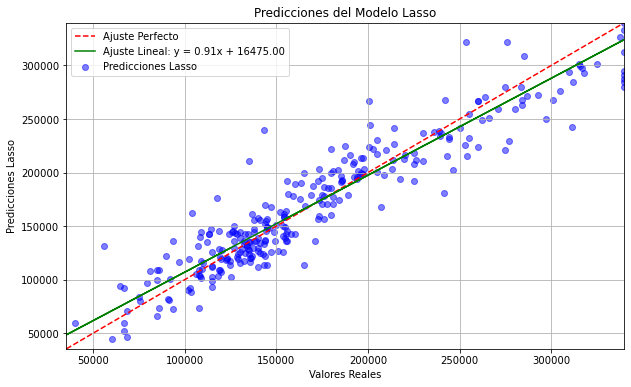

In [80]:
# Supongo que ya tienes tu modelo Lasso y has hecho las predicciones
# y_test: los valores reales
# y_pred_lasso: las predicciones del modelo Lasso

# Crear un gráfico de dispersión de las predicciones vs. los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5, label='Predicciones Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ajuste Perfecto')

# Ecuación de la recta
m, b = np.polyfit(y_test, y_pred_lasso, 1)
plt.plot(y_test, m * y_test + b, color='green', label=f'Ajuste Lineal: y = {m:.2f}x + {b:.2f}')

plt.title('Predicciones del Modelo Lasso')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Lasso')
plt.legend()
plt.grid(True)
plt.xlim([min(y_test), max(y_test)])
plt.ylim([min(y_test), max(y_test)])
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.show()


In [85]:
# Coeficientes del modelo Lasso (reemplaza esto con los coeficientes que obtuviste)
lasso_coefficients = {
    'MSZoning_FV': 38962.55,
    'SaleCondition_Alloca': 38699.30,
    'SaleType_Otros': 37688.58,
    'Neighborhood_StoneBr': 34020.19,
    'Neighborhood_Veenker': 33686.99,
    # Añade aquí otros coeficientes
    'RoofStyle_Hip': -47018.85,
    'RoofStyle_Gable': -47788.84,
    'RoofStyle_Gambrel': -47913.76,
    'Functional_Otros': -49267.91,
    'RoofMatl_Otros': -74554.60
}

# Crear la ecuación del modelo Lasso
intercept = 0  # Cambia esto por el valor del intercepto si lo tienes
equation = f'y = {intercept} '

for variable, coefficient in lasso_coefficients.items():
    equation += f'+ {coefficient:.2f} * {variable} '

# Imprimir la ecuación
print(equation.strip())


y = 0 + 38962.55 * MSZoning_FV + 38699.30 * SaleCondition_Alloca + 37688.58 * SaleType_Otros + 34020.19 * Neighborhood_StoneBr + 33686.99 * Neighborhood_Veenker + -47018.85 * RoofStyle_Hip + -47788.84 * RoofStyle_Gable + -47913.76 * RoofStyle_Gambrel + -49267.91 * Functional_Otros + -74554.60 * RoofMatl_Otros


# Las variables más signifcativas se ven en el modelo
## Modelo Lasso

### y = 0 + 38962.55 * MSZoning_FV + 38699.30 * SaleCondition_Alloca + 37688.58 * SaleType_Otros + 34020.19 * Neighborhood_StoneBr + 33686.99 * Neighborhood_Veenker - 47018.85 * RoofStyle_Hip - 47788.84 * RoofStyle_Gable - 47913.76 * RoofStyle_Gambrel - 49267.91 * Functional_Otros - 74554.60 * RoofMatl_Otros

El modelo Lasso ha demostrado ser efectivo en la predicción de precios, alcanzando un RMSE de aproximadamente 23,257 y un R² de 0.889, lo que indica que alrededor del 88.9% de la variabilidad en los precios se puede explicar a través de las variables seleccionadas, destacando la importancia de factores como la calidad del inmueble, la ubicación y el estilo del techo en la determinación del valor de las propiedades.